# Visualización de Datos

Este notebook explora técnicas de visualización de datos usando Pandas, Matplotlib, Seaborn y Plotly. Se utilizará el dataset `Wine` de `sklearn.datasets`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Verificar versión de Python y recursos disponibles
import sys
print("Versión de Python:", sys.version)

# Verificar GPU disponible (opcional)
import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías adicionales si es necesario
!pip install seaborn plotly

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")

Versión de Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
GPU disponible: []
Entorno configurado correctamente en Google Colab


## Carga y preparación del dataset Wine

In [2]:
wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Visualización con Matplotlib

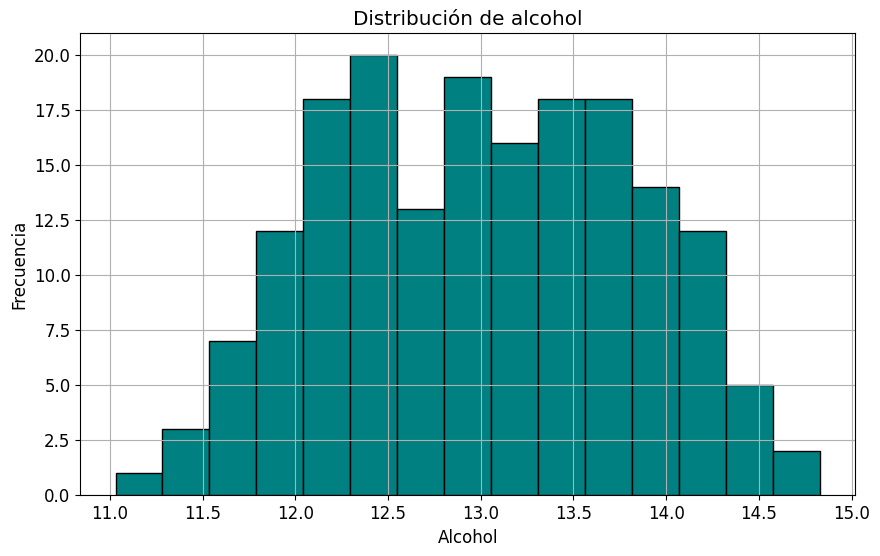

In [3]:
# Histograma del contenido de alcohol
plt.hist(df['alcohol'], bins=15, color='teal', edgecolor='black')
plt.title('Distribución de alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Interpretación del gráfico: Distribución de alcohol

El histograma muestra la frecuencia de valores de alcohol en los vinos del dataset. Observamos una distribución aproximadamente simétrica, centrada entre los 12.5 y 13.5 grados de alcohol, lo cual sugiere que la mayoría de los vinos en el conjunto tienen un contenido medio de alcohol.

Los extremos de la distribución (por debajo de 11.5 o por encima de 14.5) tienen menos observaciones, indicando que los vinos con niveles muy bajos o muy altos de alcohol son menos comunes.

Esta información es útil para entender la variabilidad natural en los niveles de alcohol y puede ser un factor clave a considerar en el análisis de clasificación por tipo de vino.


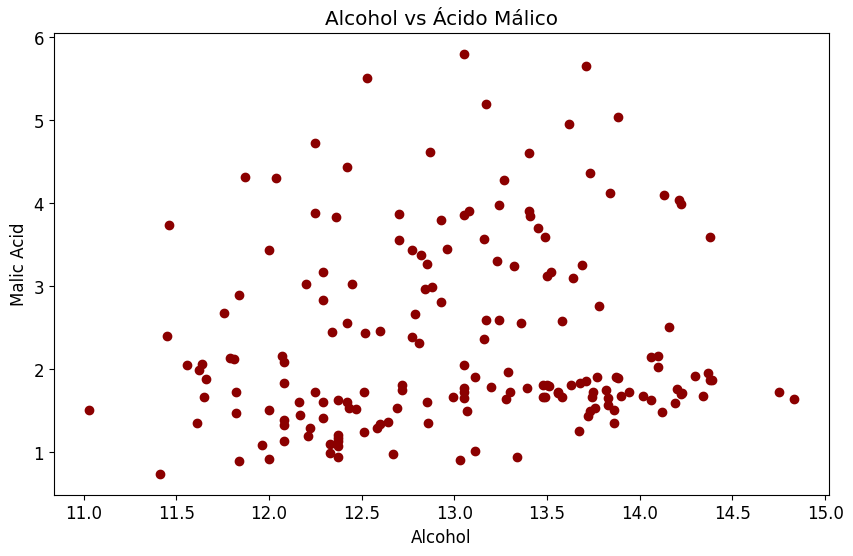

In [4]:
# Dispersión entre alcohol y malic_acid
plt.scatter(df['alcohol'], df['malic_acid'], c='darkred')
plt.title('Alcohol vs Ácido Málico')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()

### Interpretación del gráfico: Alcohol vs Ácido Málico

El gráfico de dispersión muestra la relación entre el contenido de alcohol y el nivel de ácido málico en cada vino del dataset. A simple vista, no se observa una relación lineal clara entre estas dos variables.

La mayor parte de los vinos con alto contenido de alcohol (por encima de 13.5) tienden a tener niveles bajos o moderados de ácido málico. Sin embargo, hay bastante dispersión, especialmente en los niveles bajos y medios de alcohol, donde el ácido málico puede variar considerablemente entre valores cercanos a 1 y superiores a 5.

Esto sugiere que el ácido málico no está fuertemente correlacionado con el alcohol, y por tanto, puede aportar información complementaria en modelos de clasificación sin ser redundante.


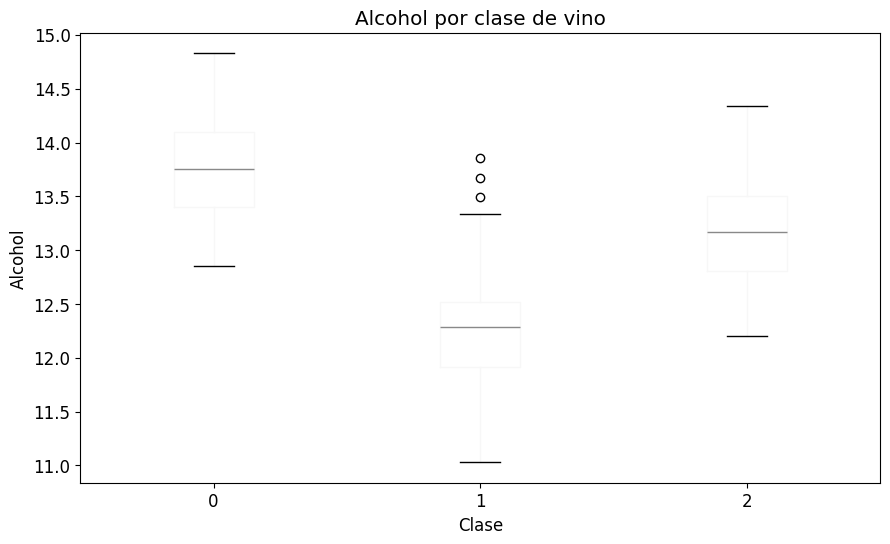

In [5]:
# Boxplot del alcohol por clase
df.boxplot(column='alcohol', by='target', grid=False)
plt.title('Alcohol por clase de vino')
plt.suptitle('')
plt.xlabel('Clase')
plt.ylabel('Alcohol')
plt.show()

### Interpretación del gráfico: Alcohol por clase de vino

Este boxplot compara la distribución del contenido de alcohol entre las tres clases de vino (0, 1 y 2).

- La clase 0 tiene el nivel más alto de alcohol en promedio, con una mediana cercana a 13.8 y valores que alcanzan hasta 14.9.
- La clase 1 muestra los valores más bajos de alcohol, con una mediana alrededor de 12.3 y un rango más limitado. Además, presenta algunos *outliers* por encima de 13.
- La clase 2 se ubica entre ambas, con una mediana cercana a 13.2.

Este gráfico revela que el contenido de alcohol puede ser una variable discriminante útil para clasificar el tipo de vino, ya que muestra diferencias significativas entre las clases.


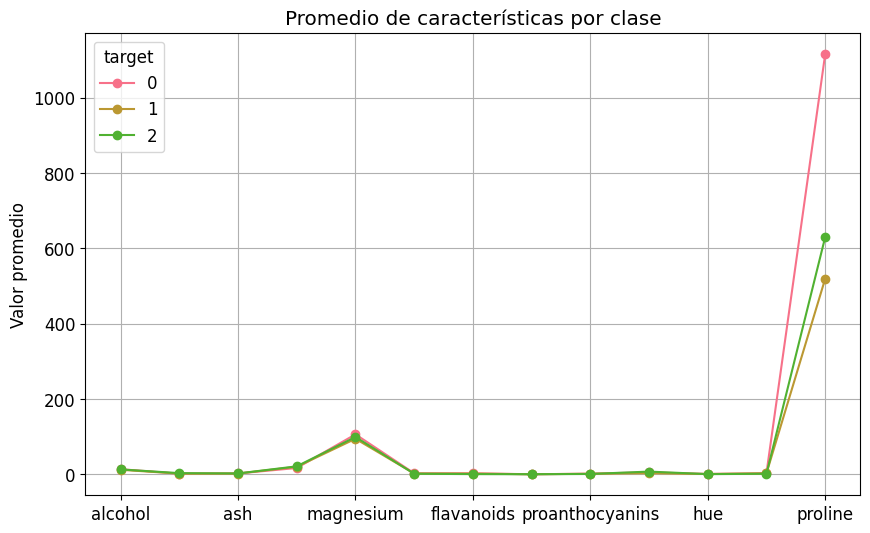

In [6]:
# Promedio de características por clase
grouped = df.groupby('target').mean().T
grouped.plot(kind='line', marker='o')
plt.title('Promedio de características por clase')
plt.ylabel('Valor promedio')
plt.grid(True)
plt.show()

### Interpretación del gráfico: Promedio de características por clase de vino

Este gráfico muestra el valor promedio de diversas características químicas para cada una de las tres clases de vino (`target 0`, `1` y `2`).

- La característica proline es la más discriminante visualmente. Los vinos de clase 0 presentan valores mucho más altos que las otras clases, lo que sugiere que esta variable podría tener un fuerte peso en la clasificación.
- También se aprecian diferencias en alcohol, magnesium y flavanoids, donde las clases muestran perfiles distintos.
- En cambio, otras variables como ash, hue o proanthocyanins se mantienen más estables entre clases, lo que indica menor utilidad discriminativa en este contexto.

Este tipo de visualización es útil para identificar cuáles variables aportan más al modelo predictivo y entender mejor la estructura del dataset.


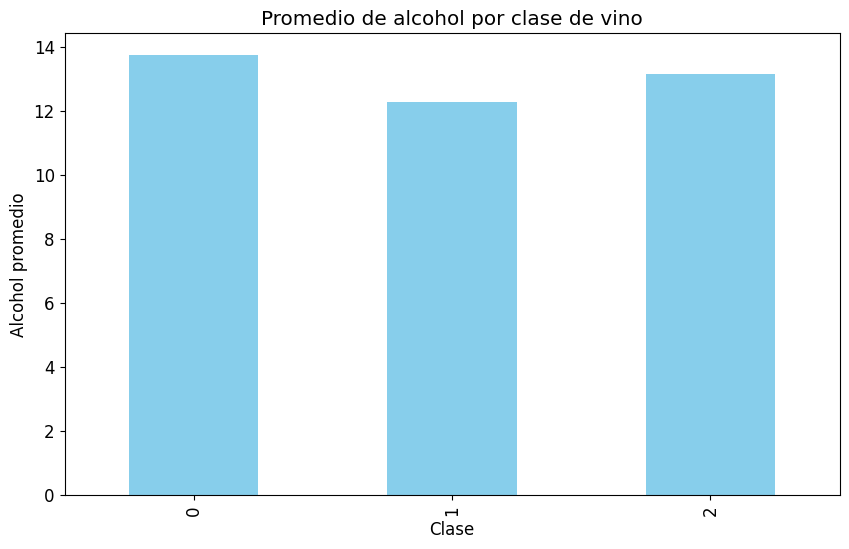

In [7]:
# Media de alcohol por clase
alcohol_means = df.groupby('target')['alcohol'].mean()
alcohol_means.plot(kind='bar', color='skyblue')
plt.title('Promedio de alcohol por clase de vino')
plt.xlabel('Clase')
plt.ylabel('Alcohol promedio')
plt.show()

### Interpretación del gráfico: Promedio de alcohol por clase de vino

Este gráfico de barras permite visualizar el promedio del contenido de alcohol en los vinos, separado por clase (`0`, `1` y `2`).

- La clase 0 tiene el promedio de alcohol más alto, alrededor de 13.8 grados.
- La clase 1 tiene el promedio más bajo, cercano a 12.3 grados.
- La clase 2 se encuentra en un punto intermedio, con un promedio cercano a 13.1 grados.

Este tipo de visualización refuerza la conclusión de que el nivel de alcohol es una variable útil para diferenciar entre tipos de vino, siendo la clase 0 la más alcohólica en promedio.


## Visualizaciones estadísticas con Seaborn

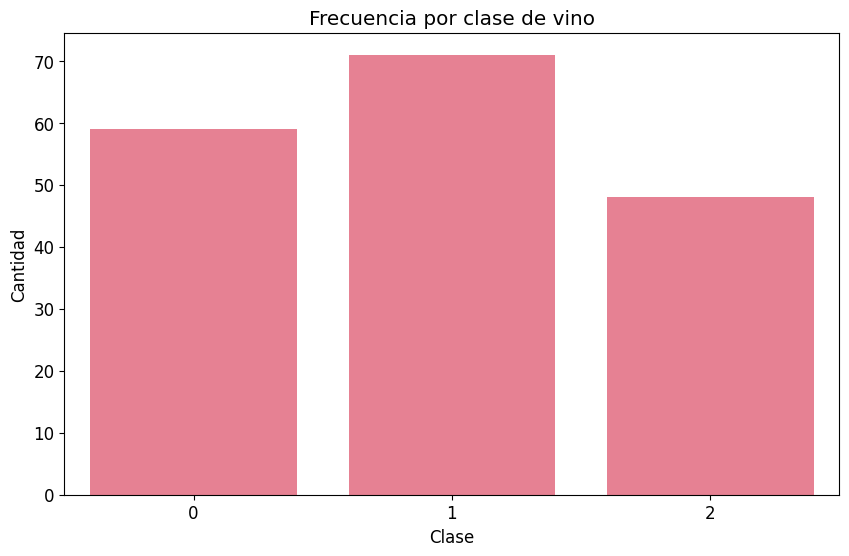

In [8]:
sns.countplot(x='target', data=df)
plt.title('Frecuencia por clase de vino')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

### Interpretación del gráfico: Frecuencia por clase de vino

El gráfico muestra la cantidad de observaciones por cada clase de vino en el dataset (`0`, `1` y `2`).

- La clase 1 es la más representada, con aproximadamente 71 vinos.
- Le sigue la clase 0 con unos 59 vinos.
- La clase 2 es la menos frecuente, con alrededor de 48 vinos.

Esta distribución no es perfectamente balanceada, pero tampoco es extremadamente desequilibrada. Es importante tener en cuenta estas proporciones al construir modelos de clasificación, ya que un modelo sesgado podría favorecer a la clase más numerosa si no se toman medidas como balanceo o ponderación.


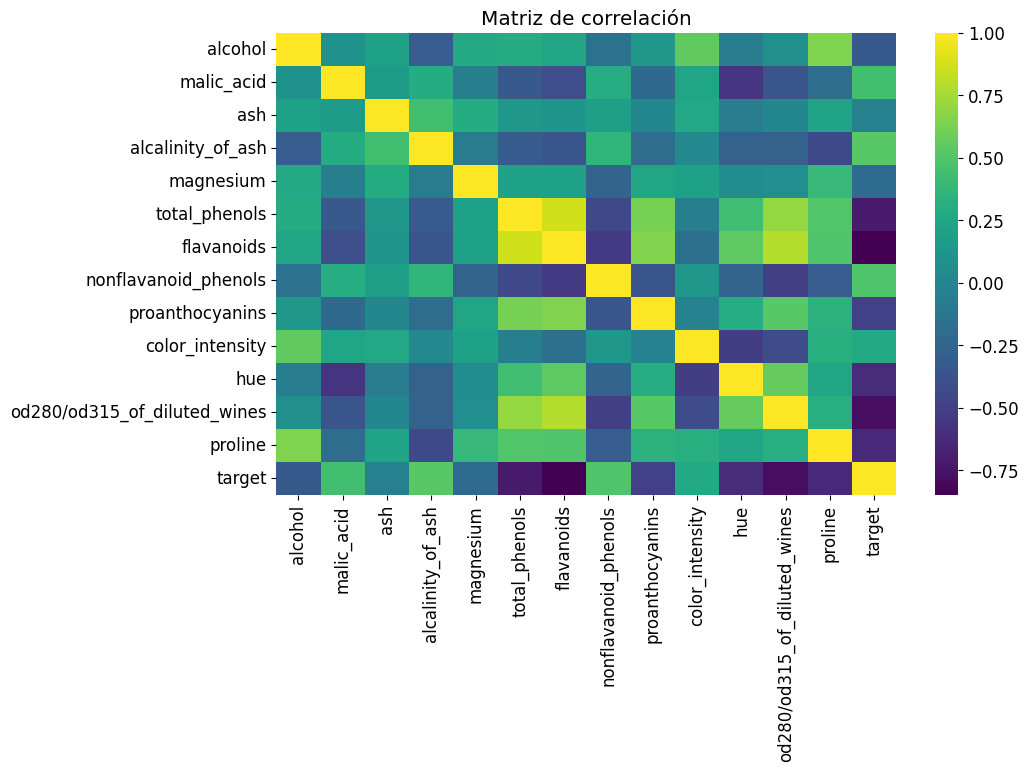

In [9]:
correlation = df.corr()
sns.heatmap(correlation, annot=False, cmap='viridis')
plt.title('Matriz de correlación')
plt.show()

### Interpretación del gráfico: Matriz de correlación

Este mapa de calor muestra la correlación de Pearson entre todas las variables numéricas del dataset, incluida la variable objetivo `target`.

#### Observaciones clave:

- La variable `proline` tiene una fuerte correlación positiva con `target`, lo que la convierte en una variable potencialmente muy útil para clasificación.
- También destacan correlaciones positivas entre:
  - `flavanoids` y `total_phenols`
  - `od280/od315_of_diluted_wines` y `flavanoids`
- Hay algunas correlaciones negativas interesantes, como:
  - `od280/od315_of_diluted_wines` con `target`
  - `malic_acid` con `flavanoids`

#### ¿Por qué es importante?
Identificar variables altamente correlacionadas con la variable objetivo puede mejorar el rendimiento de modelos supervisados. Asimismo, detectar pares de variables muy correlacionadas entre sí ayuda a evitar redundancia en modelos (multicolinealidad).

Este análisis proporciona una visión global de las relaciones entre variables y ayuda a seleccionar atributos relevantes para el modelado posterior.


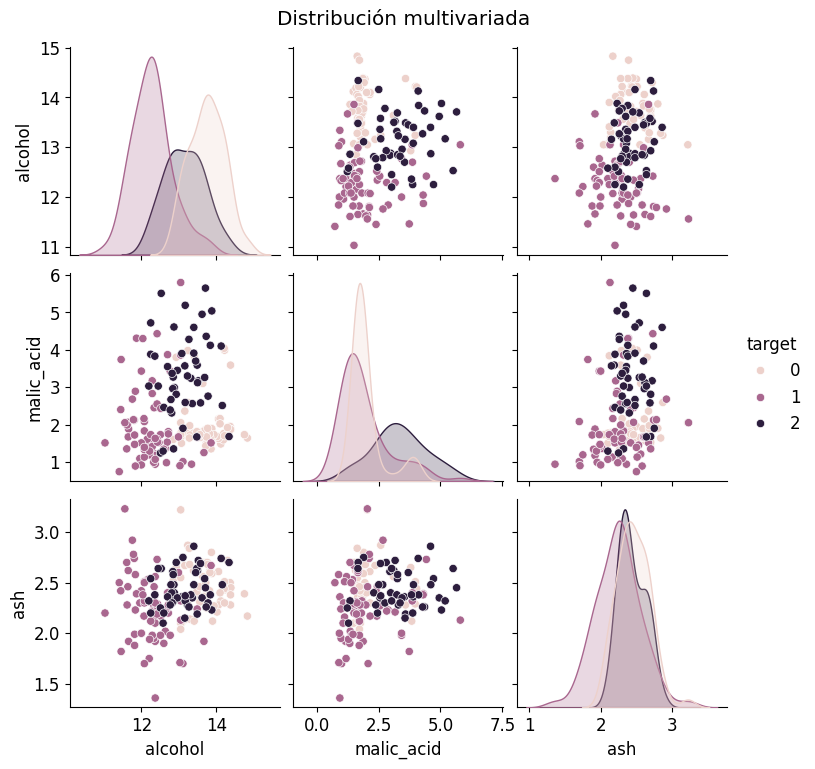

In [10]:
sns.pairplot(df[['alcohol', 'malic_acid', 'ash', 'target']], hue='target')
plt.suptitle("Distribución multivariada", y=1.02)
plt.show()

### Interpretación del gráfico: Distribución multivariada (Pairplot)

Este gráfico representa visualmente la relación entre múltiples variables (`alcohol`, `malic_acid` y `ash`) a través de gráficos de dispersión y densidad, diferenciando cada clase de vino por color.

#### Observaciones clave:

- La variable `alcohol` muestra una buena separación entre clases. La clase 0 tiende a concentrarse en valores más altos, mientras que la clase 1 se agrupa en valores más bajos.
- En cuanto a `malic_acid`, hay mayor dispersión, pero algunas agrupaciones son visibles, especialmente para la clase 2.
- La variable `ash` no parece ser muy discriminante por sí sola, ya que todas las clases se superponen bastante.
- Combinaciones como `alcohol vs malic_acid` o `alcohol vs ash` permiten observar zonas de agrupamiento por clase, lo que sugiere que estas variables juntas pueden aportar valor a modelos de clasificación.

Este tipo de análisis visual es especialmente útil para evaluar la separabilidad de clases en espacios de características antes de aplicar algoritmos de Machine Learning.


## Visualizaciones interactivas con Plotly

In [11]:
fig = px.scatter(df, x='alcohol', y='malic_acid', color=df['target'].astype(str),
                 title='Alcohol vs Malic Acid (interactivo)', labels={'target': 'Clase'})
fig.show()

### Interpretación del gráfico: Alcohol vs Malic Acid (interactivo)

Este gráfico interactivo representa la relación entre el nivel de alcohol y el ácido málico, diferenciando los vinos por su clase (`target`).

#### Observaciones clave:

- Los vinos de clase 0 (en azul) se agrupan mayoritariamente en niveles altos de alcohol y bajos de ácido málico.
- Los vinos de clase 1 (en rojo) tienden a concentrarse en la zona izquierda y baja del gráfico, es decir, menos alcohol y menos ácido málico.
- La clase 2 (en verde) se distribuye más ampliamente, con niveles variables de ambas características.

Esta visualización interactiva permite identificar zonas de agrupamiento por clase y facilita una mejor comprensión de cómo estas dos variables contribuyen a la clasificación del vino. Además, al ser interactiva, el usuario puede explorar puntos individuales y obtener detalles dinámicamente, lo cual es muy útil para el análisis exploratorio de datos.


In [12]:
fig = px.box(df, x='target', y='alcohol', points="all",
               title="Distribución de Alcohol por Clase")
fig.show()

### Interpretación del gráfico: Distribución de Alcohol por Clase (interactivo)

Este boxplot interactivo muestra cómo se distribuye el contenido de alcohol entre las distintas clases de vino (`target`) y añade los puntos individuales para cada observación.

#### Observaciones clave:

- La clase 0 (a la izquierda) tiene el mayor nivel de alcohol en promedio y también la mayor concentración de valores altos.
- La clase 1 (al centro) tiene los niveles de alcohol más bajos, con una mediana cercana a 12.3.
- La clase 2 (a la derecha) se sitúa en un punto intermedio, con una mediana cercana a 13.2.

La superposición de puntos individuales permite observar:
- Dispersión interna dentro de cada clase
- Outliers visibles
- Y una mejor comprensión visual de la densidad y la separación entre grupos

Esta visualización es muy útil para confirmar que el contenido de alcohol puede ser una variable altamente discriminante entre las clases de vino.


In [13]:
fig = px.histogram(df, x='ash', color=df['target'].astype(str),
                   nbins=20, title='Distribución de Ash por Clase')
fig.show()

### Interpretación del gráfico: Distribución de Ash por Clase

Este histograma apilado muestra cómo se distribuyen los valores de `ash` (contenido de ceniza) en los vinos de cada clase (`target`).

#### Observaciones clave:

- Las tres clases (0, 1 y 2) se superponen significativamente en sus valores de `ash`.
- La mayoría de los vinos presentan valores entre 2.2 y 2.7, sin grandes diferencias entre clases.
- La clase 2 parece tener una ligera mayor concentración en los valores intermedios, pero no lo suficiente como para considerarla una variable altamente discriminante.

En resumen, aunque `ash` podría aportar cierta información, no parece ser una variable útil por sí sola para diferenciar claramente entre las clases de vino. Su valor real podría emerger en combinación con otras características en modelos multivariados.


In [14]:
promedios = df.groupby('target').mean().reset_index().melt(id_vars='target')
fig = px.line(promedios, x='variable', y='value', color='target', markers=True,
              title='Promedio de características por clase (interactivo)')
fig.show()

### Interpretación del gráfico: Promedio de características por clase (interactivo)

Este gráfico de líneas interactivo muestra el promedio de cada variable química en el dataset de vinos, agrupado por clase (`target`). Cada línea representa una clase de vino y permite comparar de forma rápida sus perfiles químicos.

#### Observaciones clave:

- La variable `proline` vuelve a destacar con una diferencia significativa entre clases, especialmente en la clase 0, que presenta el valor promedio más alto, seguido por la clase 2, y finalmente la clase 1.
- Otras variables que muestran diferencias visibles entre clases son:
  - `alcohol`, con mayor valor promedio en clase 0
  - `malic_acid`, más alto en la clase 2
  - `flavanoids` y `od280/od315_of_diluted_wines`, donde la clase 0 también domina

Este tipo de visualización interactiva permite al analista explorar el perfil promedio de cada clase y detectar variables discriminantes con mayor facilidad. Es útil tanto para análisis exploratorio como para selección de características en modelos predictivos.


## Conclusión Final

A lo largo de este notebook, se exploraron diversas técnicas de visualización para analizar el dataset de vinos y comprender mejor cómo las variables químicas se relacionan con la clase del vino (`target`). Estas visualizaciones, tanto estáticas como interactivas, permitieron extraer patrones, correlaciones y diferencias clave entre las clases.

### Principales hallazgos:

- La variable `alcohol` muestra una clara diferenciación entre clases, siendo más alto en los vinos de clase 0.
- La característica `proline` resalta como la más discriminante, con un promedio muy superior en la clase 0 frente a las demás.
- Algunas variables, como `ash`, presentan distribución similar entre clases y tienen menor poder discriminante por sí solas.
- Las correlaciones más fuertes se encontraron entre `flavanoids`, `total_phenols`, y `od280/od315_of_diluted_wines`, sugiriendo redundancia entre ellas.
- Las visualizaciones interactivas (con `Plotly`) facilitaron la exploración detallada de los datos, permitiendo detectar agrupamientos, outliers y relaciones multivariadas de forma dinámica.
- El uso de gráficos como boxplots, pairplots, heatmaps y líneas de promedio por clase resultó fundamental para la interpretación visual del comportamiento de las variables.

La visualización de datos no solo permite detectar patrones y relaciones, sino también fundamentar decisiones sobre qué variables priorizar en futuros modelos de aprendizaje automático. En este caso, variables como `alcohol`, `proline`, `flavanoids` y `od280/od315_of_diluted_wines` se perfilan como atributos clave para un análisis predictivo posterior.

Este análisis visual sienta las bases para una selección de variables informada y una mejor interpretación del comportamiento de las clases en el dataset.
